# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [600]:
# Import the appropriate libraries
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

# Create two new dataframes
df_north=pd.read_csv("NorthCallCenter.csv")
df_south=pd.read_csv("SouthCallCenter.csv")

print(df_north.head())
print(df_south.head())

   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                 

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [499]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [500]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [501]:
df_north.shape #Only NULL values in Incoming Wait Time

(245, 15)

In [502]:
df_south.shape #Only NULL values in Incoming Wait Time

(314, 15)

In [503]:
# Put your EDA code here

df_north["Rep ID"].value_counts() #9 Reps

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [504]:
df_south["Rep ID"].value_counts() #11 Reps


Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [505]:
df_north.describe()

#North: busy minutes-9.98, not ready minutes- 1.91, incoming wait time-3.05, during call wait time-2.97.

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [506]:
df_south.describe()

#South: busy minutes-10.05, not ready minutes- 1.91, incoming wait time-3.00, during call wait time-3.07.

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [507]:
df_north["Time Block"].value_counts() #Number of calls for each time block

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [508]:
df_south["Time Block"].value_counts() #Number of calls for each time block

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch? 
9 reps in the North branch and 11 reps in the South branch.

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch? North: busy minutes-9.98, not ready minutes- 1.91, incoming wait time-3.05, during call wait time-2.97. South: busy minutes-10.05, not ready minutes- 1.91, incoming wait time-3.00, during call wait time-3.07.
3. What is the number of calls taken for each time block? North: 12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
South:12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [509]:
# Clean your data here
print(df_north.shape)
print(df_north.dtypes)
print()
print(df_south.shape)
print(df_south.dtypes)


(245, 15)
Unnamed: 0                 int64
Branch                    object
Call Purpose              object
Time Block                object
Incoming or Outgoing      object
Queue                     object
Rep ID                    object
Sale                      object
Lost Call                  int64
Abandoned                  int64
Busy Minutes               int64
Not Ready Minutes          int64
Incoming Wait Time       float64
During Call Wait Time      int64
Calls                      int64
dtype: object

(314, 15)
Unnamed: 0                 int64
Branch                    object
Call Purpose              object
Time Block                object
Incoming or Outgoing      object
Queue                     object
Rep ID                    object
Sale                      object
Lost Call                  int64
Abandoned                  int64
Busy Minutes               int64
Not Ready Minutes          int64
Incoming Wait Time       float64
During Call Wait Time      int64
Calls   

In [510]:
df_north[["Incoming or Outgoing", "Incoming Wait Time"]].groupby("Incoming or Outgoing").mean() 
#Outgoing calls have NULL incoming wait time

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.04878
Outgoing,NaN


In [511]:
#Replaced NULL Incoming wait times 
mean_north=df_north["Incoming Wait Time"].mean()
df_north["Incoming Wait Time"]=df_north["Incoming Wait Time"].fillna(mean_north)
print("Updated: ")
df_north.tail()

Updated: 


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,3.04878,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,3.04878,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,3.04878,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,3.04878,2,1
244,244,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,3.04878,4,1


In [512]:
df_south.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [513]:
df_south[["Incoming or Outgoing", "Incoming Wait Time"]].groupby("Incoming or Outgoing").mean() 
#Outgoing calls have NULL incoming wait time

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.0
Outgoing,NaN


In [514]:
#Replaced NULL Incoming wait times 
mean_south=df_south["Incoming Wait Time"].mean()
df_south["Incoming Wait Time"]=df_south["Incoming Wait Time"].fillna(mean_south)
print("Updated: ")
df_south.tail()

Updated: 


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,3.0,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,3.0,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,3.0,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,3.0,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,3.0,3,1


In [515]:
#numeric columns
df_numeric=df_north.select_dtypes(include=[np.number])
numeric_cols=df_numeric.columns.values
print(numeric_cols)

#non numeric columns
df_numeric=df_south.select_dtypes(include=[np.number])
numeric_cols=df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'Lost Call' 'Abandoned' 'Busy Minutes' 'Not Ready Minutes'
 'Incoming Wait Time' 'During Call Wait Time' 'Calls']
['Unnamed: 0' 'Lost Call' 'Abandoned' 'Busy Minutes' 'Not Ready Minutes'
 'Incoming Wait Time' 'During Call Wait Time' 'Calls']


In [516]:
#numeric columns
df_non_numeric=df_north.select_dtypes(exclude=[np.number])
non_numeric_cols=df_non_numeric.columns.values
print(non_numeric_cols)

#non numeric columns
df_non_numeric=df_south.select_dtypes(exclude=[np.number])
non_numeric_cols=df_non_numeric.columns.values
print(non_numeric_cols)

['Branch' 'Call Purpose' 'Time Block' 'Incoming or Outgoing' 'Queue'
 'Rep ID' 'Sale']
['Branch' 'Call Purpose' 'Time Block' 'Incoming or Outgoing' 'Queue'
 'Rep ID' 'Sale']


In [517]:
print(df_north["Sale"].value_counts())
print(df_north["Sale"].dtypes) 
#There is a space after one of the 'YES' values creating a seperate value of 'YES'.

NO      234
YES      10
YES       1
Name: Sale, dtype: int64
object


In [518]:
df_north['Sale'].replace('YES ', 'YES', inplace=True)
print(df_north["Sale"].value_counts())
#Removed the space by using the replace funtion.

NO     234
YES     11
Name: Sale, dtype: int64


In [519]:
print(df_north.duplicated().sum()) #No duplicates
print(df_south.duplicated().sum()) #No duplicates

0
0


In [520]:
df_north["Call Purpose"].value_counts()#Checking values to see if the Call Purpose column should be dropped.

Product Support    145
Sales Support       85
Complaint           15
Name: Call Purpose, dtype: int64

In [521]:
df_south["Call Purpose"].value_counts()#Checking values to see if the Call Purpose column should be dropped.

Product Support    165
Sales Support      113
Complaint           36
Name: Call Purpose, dtype: int64

In [522]:
#Dropping unnecessary columns
df_north.drop(["Sale"], axis=1, inplace=True)
df_north.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1


In [523]:
#Dropping unnecessary columns
df_south.drop(["Sale"], axis=1, inplace=True)
df_south.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,0,8,3,1.0,3,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? Yes.Replaced the NULL with the mean.
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?A space after one of the 'YES' values created 2 seperate values. Updated the 'YES' value using the replace function
3. Are there duplicates in the two data sets? If there are, how did you handle them? There are no duplicates.
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it? Yes, the Queue, Sale, and Calls columns are unnecessary. Used the drop function to drop these columns.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [524]:
# Manipulate data here
df=df_north.append(df_south)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,0,0,10,3,3.0,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,0,0,12,3,3.0,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,0,9,3,3.0,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,0,0,10,1,3.0,2,1


In [525]:
df.shape

(559, 14)

In [526]:
df.groupby(['Branch'])['Rep ID'].value_counts()
#Brent has most calls for North-37
#Eric has most calls for South-35

Branch  Rep ID
North   Brent     37
        Lilly     30
        Duke      29
        Todd      29
        Joe       26
        Cam       24
        Xander    24
        Amanda    23
        Andy      23
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
        George    29
        Kate      29
        Karl      28
        Josh      26
        Susan     26
        Sharon    25
        Alice     20
Name: Rep ID, dtype: int64

In [527]:
#abandoned calls for company
df['Abandoned'].value_counts()

0    548
1     11
Name: Abandoned, dtype: int64

In [528]:
#The company is inside the optimal range of call abandonment
abandoned=df.agg({'Abandoned':['sum']})
print(abandoned)
print(abandoned/559*100)

     Abandoned
sum         11
     Abandoned
sum     1.9678


In [529]:
#abandoned calls for North and South
abandoned_branch=df.groupby(['Branch']).agg({'Abandoned':['sum']})
print(abandoned_branch)
print()
print(df['Branch'].value_counts())
print()
print("North: ", 7/245*100)
print("South: ", 4/314*100)

#North is in the optimal range of call abandonment 2.85% and South is below the optimal range 1.27%.



       Abandoned
             sum
Branch          
North          7
South          4

South    314
North    245
Name: Branch, dtype: int64

North:  2.857142857142857
South:  1.2738853503184715


In [530]:
#What is the percentage of calls answered within 2 seconds for each company and the entire company?
calls_answered=df['Incoming Wait Time'].value_counts().sort_index()
print(calls_answered)
print()
df1=df[df['Incoming Wait Time']<=2].groupby('Incoming Wait Time')['Incoming Wait Time'].count().sum()
print(df1)
print()
print(df1/559*100)

#14.5% of the company calls are answered in 2 seconds or less

1.00000     37
2.00000     44
3.00000    229
3.04878    163
4.00000     50
5.00000     36
Name: Incoming Wait Time, dtype: int64

81

14.490161001788909


In [531]:
calls_answered_branch=df.groupby(['Branch', 'Incoming Wait Time'])['Branch'].count()
print(calls_answered_branch)
print()
print(df['Branch'].value_counts())
print()
print("North: ",33/245*100)
print("South: ",48/314*100)

#13.5% of North calls are answered in 2 seconds or less
#15.2% of South calls are answered in 2 seconds or less

Branch  Incoming Wait Time
North   1.00000                17
        2.00000                16
        3.00000                12
        3.04878               163
        4.00000                20
        5.00000                17
South   1.00000                20
        2.00000                28
        3.00000               217
        4.00000                30
        5.00000                19
Name: Branch, dtype: int64

South    314
North    245
Name: Branch, dtype: int64

North:  13.46938775510204
South:  15.286624203821656


In [532]:
#Speed of call
call_speed=df['Incoming Wait Time'].mean()
call_speed
#average answer speed for the company is 3.02 seconds

3.0213796413456047

In [533]:
call_speed=df.agg({'Incoming Wait Time':['mean']})
call_speed
#average answer speed is 3.02 for the company

,Incoming Wait Time
mean,3.02138


In [534]:
call_speed_branch=df.groupby(['Branch']).agg({'Incoming Wait Time':['mean']})
call_speed_branch
#average answer speed is 3.04 for North and 3.0 for South.

,Incoming Wait Time
,mean
Branch,
North,3.04878
South,3.00000


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls. Brent has most calls for North-37, Eric has most calls for South-35
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? The company is inside the optimal range of call abandonment(1.96%~2%). North is in the optimal range of call abandonment 2.85% and South is below the optimal range 1.27%.
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company? 14.5% of the company calls are answered in 2 seconds or less. 13.5% of North calls are answered in 2 seconds or less and 15.2% of South calls are answered in 2 seconds or less.
4. For each branch and the entire company, what is the average speed of answer? average answer speed is 3.02 for the company. Average answer speed is 3.04 for North and 3.0 for South.

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

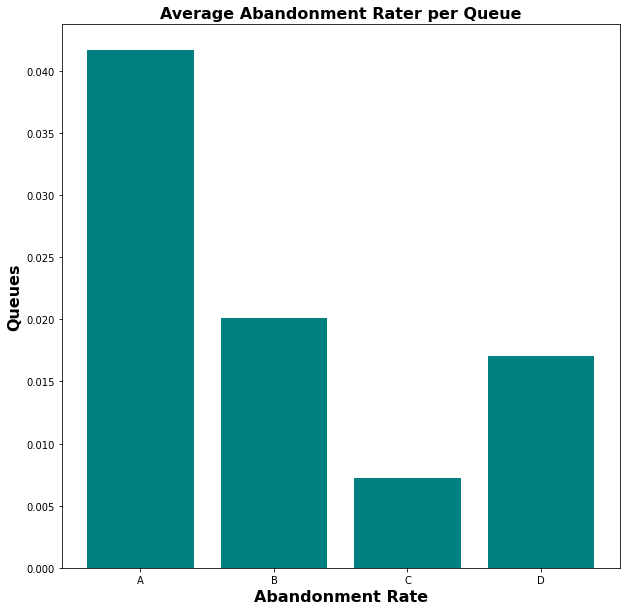

In [684]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

keys=abandonment_rates.keys()
values=abandonment_rates.values()

plt.figure(figsize=(10, 10))
plt.bar(keys, values, color='teal')

plt.xlabel('Abandonment Rate', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Queues', color = 'black', fontsize = 16, fontweight = 'bold')
plt.title('Average Abandonment Rater per Queue', color = 'black', fontsize = 16, fontweight = 'bold')
plt.show()

#Chose a bar graph to easily see which queues has the most abandonment calls.
    
    

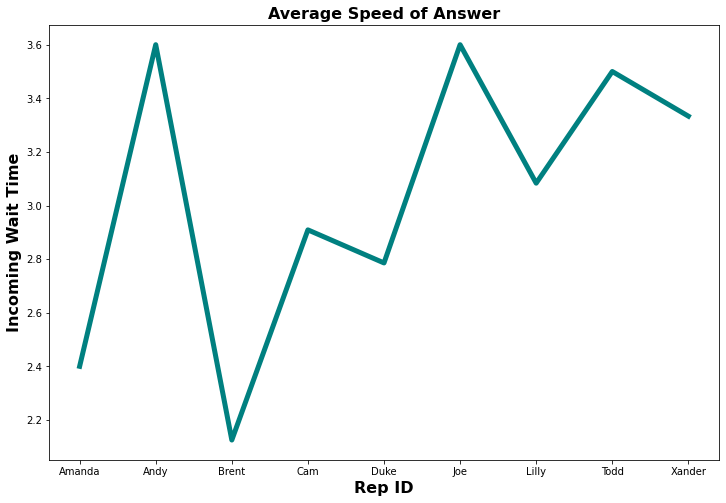

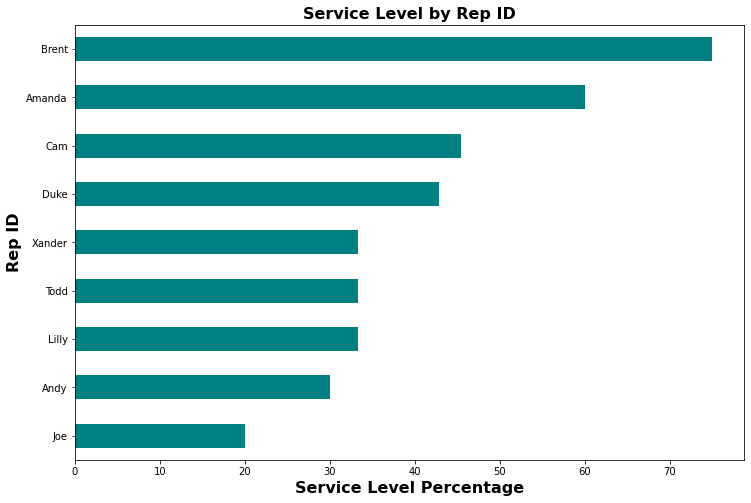

In [687]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df_north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(north_plt['Rep ID'], north_plt['Incoming Wait Time'], color='teal', linewidth=5)
plt.xlabel('Rep ID', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Incoming Wait Time', color = 'black', fontsize = 16, fontweight = 'bold')
plt.title('Average Speed of Answer', color = 'black', fontsize = 16, fontweight = 'bold')
#linechart is easy to see who has the highest and lowest average speed of answer.

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_north[df_north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df_north[df_north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

plt.figure(figsize=(12, 8))
service_level['Service Level %'].sort_values(ascending=True).plot.barh(service_level["Service Level %"], color='teal')
plt.xlabel('Service Level Percentage', color = 'black', fontsize = 16, fontweight = 'bold')
plt.ylabel('Rep ID', color = 'black', fontsize = 16, fontweight = 'bold')
plt.title('Service Level by Rep ID', color = 'black', fontsize = 16, fontweight = 'bold')
plt.show()
#the horizontal bar chart easily shows who leads in service level percentage by rep id.

{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}
{'Complaints': [51, 0], 'Sales Support': [75, 123], 'Product Support': [82, 228]}


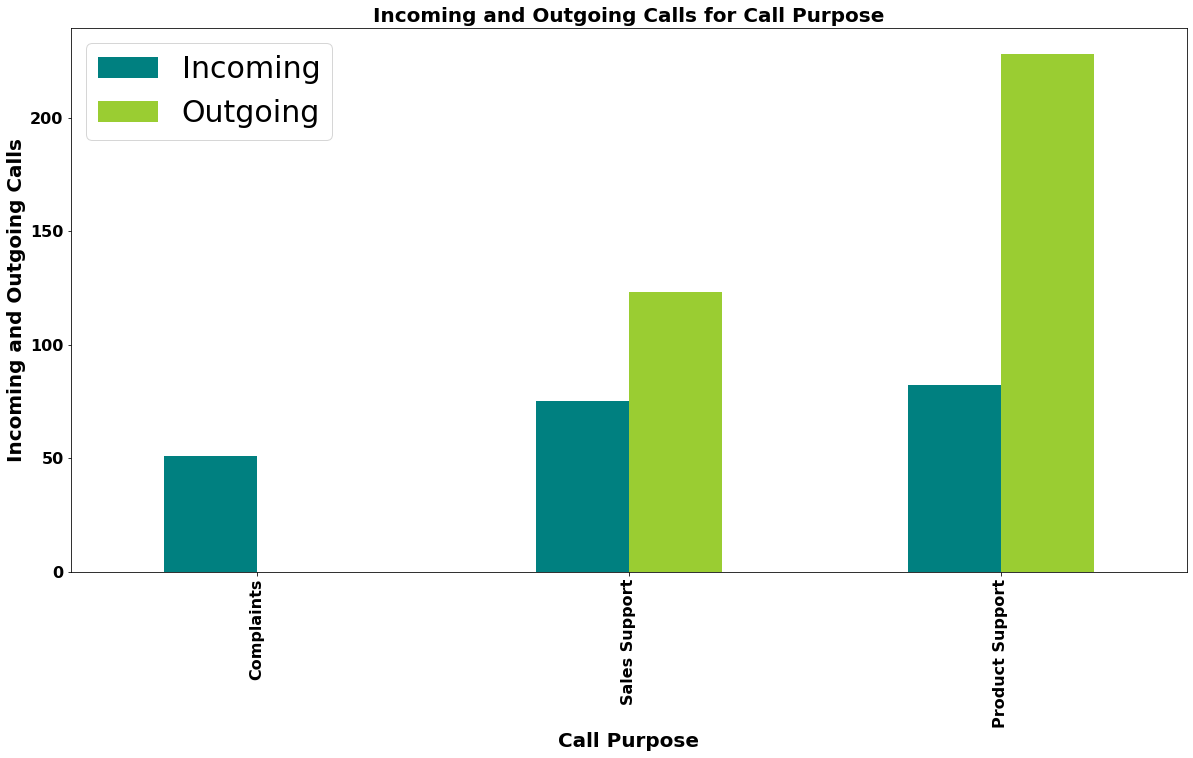

In [836]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
df.head()

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
print(complaints)
sales_support = purpose_counts["Sales Support"].to_dict()
print(sales_support)
product_support = purpose_counts["Product Support"].to_dict()
print(product_support)
data={
    "Complaints": [51, 0],
    "Sales Support": [75, 123],
    "Product Support": [82, 228]
}
print(data)

d=pd.DataFrame(data).T
d.plot(kind='bar', color=['teal', 'yellowgreen'])
plt.xlabel('Call Purpose', color = 'black', fontsize = 20, fontweight = 'bold')
plt.ylabel('Incoming and Outgoing Calls', color = 'black', fontsize = 20, fontweight = 'bold')
plt.title('Incoming and Outgoing Calls for Call Purpose', color = 'black', fontsize = 20, fontweight = 'bold')
plt.legend(['Incoming', 'Outgoing'], loc = 'upper left', prop={'size': 30}, fontsize = 15)
plt.xticks(color = 'black',fontsize=16, fontweight='bold')
plt.yticks(color = 'black',fontsize=16, fontweight='bold')
plt.show()

#Chose the grouped bar charp to clearly see how many calls by purpose were incoming and outgoing. Can clearly see complaints are only incoming and most outgoing calls are for product support.

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? The North branch is operating more efficiently. They have less abandoned calls and answer their calls quickly.
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help? The South branch could use the extra help due to their average speed of answer and abandonement rate.
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis? Information that would have been helpful is how long each call was and survey scores if they sent a survey out after the call.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
